## 5.1　交差検証

In [17]:
import mglearn
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GroupKFold

In [18]:
X, y = make_blobs(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
logreg = LogisticRegression().fit(X_train, y_train)

print('Test set score: {:.2f}'.format(logreg.score(X_test, y_test)))

Test set score: 0.88


scoreメソッドは、正しくクラス分類されたサンプルの割合を計算している。

5分割交差検証法であれば、最初にデータを5分割にする。<br>
その後、以下の流れで訓練データとテストデータを分割して学習していく。

・1個目をテストデータ、2～5個目を訓練データ<br>
・2個目をテストデータ、1,3～5個目を訓練データ<br>
・3個目をテストデータ、1～2,4～5個目を訓練データ<br>
・4個目をテストデータ、1～3,5個目を訓練データ<br>
・5個目をテストデータ、1～4個目を訓練データ

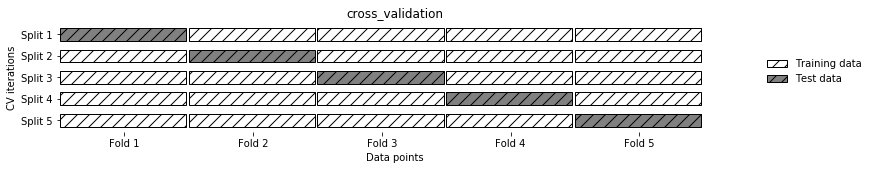

In [20]:
mglearn.plots.plot_cross_validation()

### 5.1.1　scikit-learnでの交差検証

In [21]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

cross_val_score関数は、引数に**モデル・訓練データ・正解ラベル**を持つ。

In [22]:
scores = cross_val_score(logreg, iris.data, iris.target)

print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


次に5分割で実行してみる。

In [23]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)

print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


交差検証の精度をまとめる際は、平均値を使用する。

In [24]:
print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Average cross-validation score: 0.97


### 5.1.2　交差検証の利点

cross_val_scoreは内部的に複数のモデルを作成するが、目的はあくまで作成したモデルの正確な評価を行うことである。

### 5.1.3　層化k分割交差検証と他の戦略

In [25]:
iris = load_iris()

print('Iris labels:\n{}'.format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


上記をk分割交差検証すると、訓練データがクラス0、テストデータがクラス1,2などとなってしまう。<br>
これを防ぐために、クラスの比率が全体の比率と同じようになる**層化k分割交差検証**（stratified k-field cross-validation）を行う。

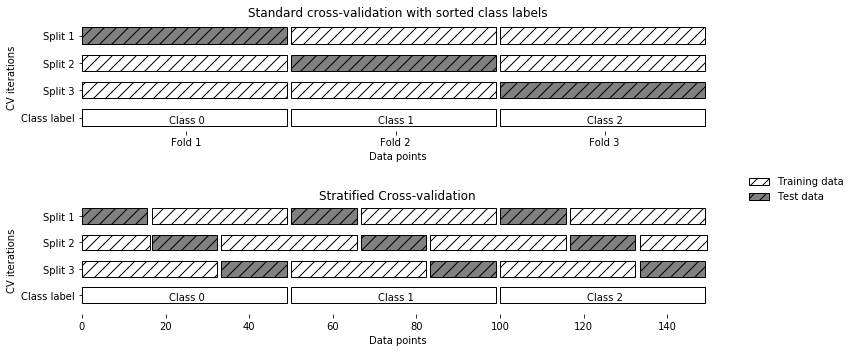

In [26]:
mglearn.plots.plot_stratified_cross_validation()

### 5.1.3.1　交差検証のより詳細な制御

回帰ではk分割交差検証、分類では層化k分割交差検証がデフォルトになっているが<br>
意図的に分類でk分割交差検証を使用したくなるケースもある。その際は、KFoldを利用する。

In [27]:
kfold = KFold(n_splits=5)

print('Cross-validation scores:\n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


今度は3分割のKFoldで実行してみる。<br>
irisの3種類のクラスがきれいに3分割されてしまうので、何も学習できない。

In [28]:
kfold = KFold(n_splits=3)

print('Cross-validation scores:\n{}'.format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


これを回避するために、データをシャッフルしてラベル順に並ばないようにする方法がある。<br>
また、データをシャッフルする場合には、再現性を持たせることも重要である。

次に例では、データをシャッフルしてから3分割交差検証を行っている。

In [29]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

print('Cross-validation scores:\n{}'.format(cross_val_score(logreg, iris.data, iris.target,cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


### 5.1.3.2　1つ抜き交差検証

以下のように、テストデータを1つだけ抜き出して、残りを全て訓練データに割り当てる方法

1回目：1個目をテストデータ、2～100個目を訓練データ<br>
2回目：2個目をテストデータ、1,3～100個目を訓練データ<br>
　┇　　　　　　　　　　　┇<br>
100回目：100個目をテストデータ、1～99個目を訓練データ

In [30]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

print('Number of cv iterations:', len(scores))
print('Mean accuracy: {:.2f}'.format(scores.mean()))

Number of cv iterations: 150
Mean accuracy: 0.97


### 5.1.3.3　シャッフル分割交差検証

10個のデータから成るデータセットを用意して、訓練データを5個、テストデータを2個に設定し、4分割交差検証を行う。

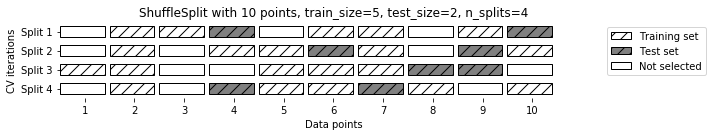

In [31]:
mglearn.plots.plot_shuffle_split()

In [32]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

print('Cross-validation scores:\n{}'.format(scores))

Cross-validation scores:
[0.97333333 0.97333333 0.94666667 0.94666667 0.92       0.97333333
 0.96       0.97333333 0.97333333 0.97333333]


上記に加えて、シャッフル分割層化検証の層化バージョン（StratifiedShuffleSplit）もある。

### 5.1.3.4　グループ付き交差検証

訓練データとテストデータを重複させたくない場合、グループ付き交差検証を利用する。

これはラベル（目的変数）ごとではなく、各データに対して数字を与えてグループ化し<br>
訓練データとテストデータでグループが重複しないようにする交差検証である。

In [33]:
X, y = make_blobs(n_samples=12, random_state=0)

pd.DataFrame(X)

,0,1
0,3.549347,0.692505
1,1.926358,4.152430
2,0.005875,4.387241
3,1.120314,5.758061
4,1.737308,4.425462
5,2.368335,0.043568
6,-0.497722,1.551282
7,-1.481145,2.730698
8,0.873051,4.714386
9,-0.662468,2.175717


In [34]:
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

引数にgroupsを指定する。

In [35]:
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))

print('Cross-validation scores:\n{}'.format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


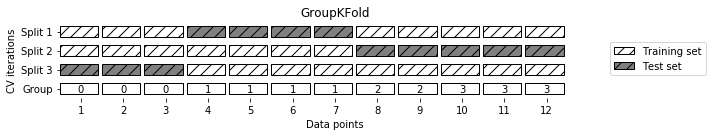

In [36]:
mglearn.plots.plot_group_kfold()

交差検証において多くの場合には、標準のKFold、StatifiedKFold、GroupKFoldを用いれば良い。